<a href="https://colab.research.google.com/github/sumanth00100/HelloWorld/blob/main/Project12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the required dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras import Sequential
from sklearn.metrics import accuracy_score
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
# Loading the dataset
credit_data = pd.read_csv('creditcard.csv')


In [ ]:
#First five rows of the dataset
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#dataset information
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#checking for the null values
credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
#distribution of legit information & fraud transacations
credit_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
# The dataset is imbalanced
# 0 in class is legit transaction and 1 in class is a fraud transaction
#seperating the data for analysis
legit_data = credit_data[credit_data.Class == 0]
fraud_data = credit_data[credit_data.Class == 1]

In [ ]:
print(legit_data.shape)
print(fraud_data.shape)

(284315, 31)
(492, 31)


In [ ]:
#statstical measures of data
legit_data.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:

fraud_data.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
#Compare values for both the transactions
credit_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
# The data is unbalanced
#Building  sample dataset containing the similar distribution 
legit_data_sample = legit_data.sample(n=492)

In [ ]:
# Concatining the dataframes
data = pd.concat([legit_data_sample, fraud_data],axis=0)

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
103333,68601.0,1.286493,-0.523521,0.416515,-1.096840,-0.685536,0.171163,-0.802178,0.240460,1.813769,...,0.101344,0.498211,-0.277265,-0.812511,0.720395,-0.473274,0.083697,0.008969,1.00,0
115611,73934.0,1.213740,0.364992,0.294810,0.635678,-0.112264,-0.583608,0.064167,-0.111442,-0.094418,...,-0.250630,-0.648913,0.149087,0.056199,0.170813,0.121392,-0.001271,0.029159,1.79,0
268320,163152.0,-1.196037,1.585949,2.883976,3.378471,1.511706,3.717077,0.585362,-0.156001,0.122648,...,-0.370294,0.524395,-0.355170,-0.869790,-0.133198,0.327804,-0.035702,-0.858197,7.56,0
29275,35388.0,1.396627,0.132258,-0.815967,-0.225070,0.471944,-0.611034,0.418914,-0.307636,-0.045546,...,-0.133079,-0.382388,-0.268834,-0.922505,0.731235,1.155705,-0.118211,-0.021065,19.95,0
86631,61324.0,-0.574956,-4.092030,-2.695826,-0.836715,0.635294,3.546353,0.561257,0.425266,-1.021014,...,0.742312,-0.373310,-1.138289,1.111077,0.558886,-0.163461,-0.207760,0.182500,1074.80,0


In [ ]:
data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [ ]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93087.018293,0.092819,0.036459,-0.031622,-0.009367,0.056296,-0.095957,0.074909,0.039926,0.018905,...,0.006898,-0.028367,-0.004113,-0.005580,0.02635,0.008792,-0.004616,-0.000731,-0.003571,76.189553
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
# Dropping the Class Column and adding it to the targtet variable Y
X= data.drop(columns = 'Class', axis = 1)
Y=data['Class']

In [ ]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
103333   68601.0  1.286493 -0.523521  0.416515 -1.096840 -0.685536  0.171163   
115611   73934.0  1.213740  0.364992  0.294810  0.635678 -0.112264 -0.583608   
268320  163152.0 -1.196037  1.585949  2.883976  3.378471  1.511706  3.717077   
29275    35388.0  1.396627  0.132258 -0.815967 -0.225070  0.471944 -0.611034   
86631    61324.0 -0.574956 -4.092030 -2.695826 -0.836715  0.635294  3.546353   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [ ]:
print(Y)

103333    0
115611    0
268320    0
29275     0
86631     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [ ]:
# Splitting the Data into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

In [ ]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(787, 30) (197, 30) (787,) (197,)


In [ ]:
#Logistic Regreesion on the data
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction, Y_train)

In [ ]:
#  Training data accuracy
print(training_data_accuray)

0.9145299145299145


In [ ]:
X_test_prediction = model.predict(X_test)
testing_data_accuray = accuracy_score(X_test_prediction, Y_test)

In [ ]:
#  Testing data accuracy
print(testing_data_accuray)

0.9289340101522843


In [ ]:
# Classification Report for train data
Y_pred = model.predict(X_train)
report = classification_report(Y_train, Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       393
           1       0.96      0.93      0.94       394

    accuracy                           0.95       787
   macro avg       0.95      0.95      0.95       787
weighted avg       0.95      0.95      0.95       787



In [ ]:
# Classification Report for test data
Y_pred = model.predict(X_test)
report = classification_report(Y_test, Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        99
           1       0.98      0.88      0.92        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



In [ ]:
#confusion matrix for train data
y_pred = model.predict(X_train)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=Y_train, y_pred=y_pred)

# Print the confusion matrix
print('Confusion Matrix:\n', conf_matrix)

# Calculate precision and recall scores
precision = precision_score(y_true=Y_train, y_pred=y_pred)
recall = recall_score(y_true=Y_train, y_pred=y_pred)

# Print precision and recall scores
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))

Confusion Matrix:
 [[378  15]
 [ 28 366]]
Precision: 0.96
Recall: 0.93


In [ ]:

#confusion matrix for test data
y_pred = model.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=y_pred)

# Print the confusion matrix
print('Confusion Matrix:\n', conf_matrix)

# Calculate precision and recall scores
precision = precision_score(y_true=Y_test, y_pred=y_pred)
recall = recall_score(y_true=Y_test, y_pred=y_pred)

# Print precision and recall scores
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))

Confusion Matrix:
 [[97  2]
 [12 86]]
Precision: 0.98
Recall: 0.88


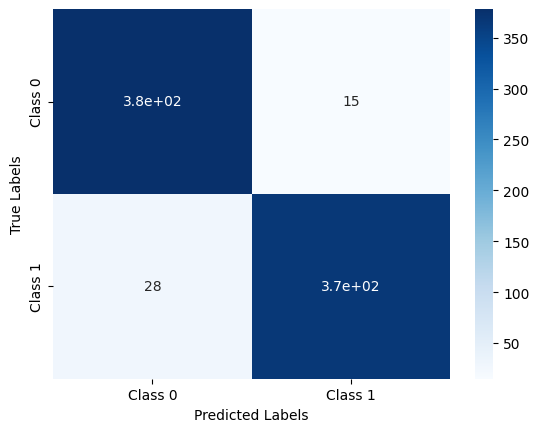

In [ ]:
#HeatMap for train data
y_pred = model.predict(X_train)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=Y_train, y_pred=y_pred)

# Define class labels
class_labels = ['Class 0', 'Class 1']

# Create confusion matrix plot
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

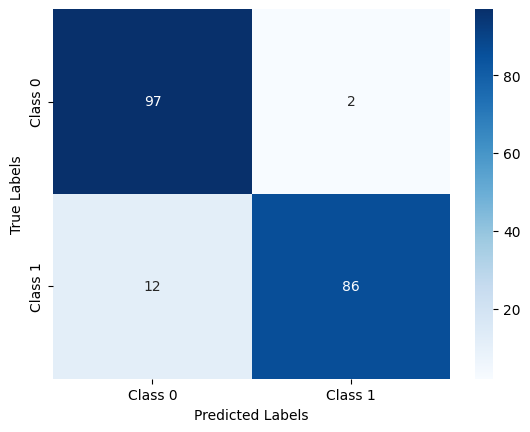

In [ ]:
#HeatMap for test data
y_pred = model.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=y_pred)

# Define class labels
class_labels = ['Class 0', 'Class 1']

# Create confusion matrix plot
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
#KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn.fit(X_train, Y_train)

# Predict the labels of the training and test data

KNeighborsClassifier(n_neighbors=3)

In [ ]:
X_train_prediction = knn.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction, Y_train)


In [ ]:
X_test_prediction = knn.predict(X_test)
testing_data_accuray = accuracy_score(X_test_prediction, Y_test)

In [ ]:
#Training Data accuracy and Test Data accuyracy
print(training_data_accuray)
print(testing_data_accuray)

0.8132147395171537
0.6294416243654822


In [ ]:
y_pred = knn.predict(X_train)

# Print the classification report
print(classification_report(Y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       393
           1       0.81      0.81      0.81       394

    accuracy                           0.81       787
   macro avg       0.81      0.81      0.81       787
weighted avg       0.81      0.81      0.81       787



In [ ]:
y_pred = knn.predict(X_test)

# Print the classification report
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.62      0.68      0.65        99
           1       0.64      0.58      0.61        98

    accuracy                           0.63       197
   macro avg       0.63      0.63      0.63       197
weighted avg       0.63      0.63      0.63       197



[[320  73]
 [ 74 320]]
Precision: 0.81
Recall: 0.81


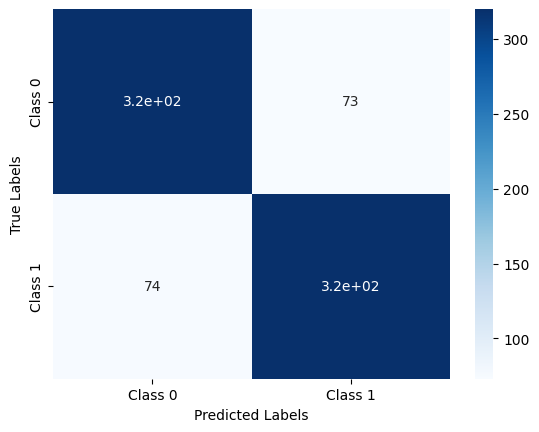

In [ ]:
y_pred = knn.predict(X_train)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=Y_train, y_pred=y_pred)
print(conf_matrix)
precision = precision_score(y_true=Y_train, y_pred=y_pred)
recall = recall_score(y_true=Y_train, y_pred=y_pred)

# Print precision and recall scores
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))

# Define class labels
class_labels = ['Class 0', 'Class 1']

# Create confusion matrix plot
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

[[88 11]
 [ 9 10]]
Precision: 0.48
Recall: 0.53


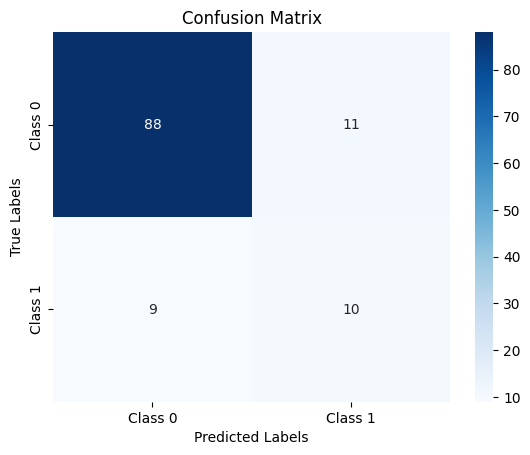

In [ ]:
#Heatmap for test data
y_pred = knn.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=y_pred)
print(conf_matrix)
precision = precision_score(y_true=Y_test, y_pred=y_pred)
recall = recall_score(y_true=Y_test, y_pred=y_pred)

# Print precision and recall scores
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))

# Define class labels
class_labels = ['Class 0', 'Class 1']

# Create confusion matrix plot
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
#SVM
clf = svm.SVC(kernel='linear')

# Train the classifier on the training data


In [ ]:
clf.fit(X_train, Y_train)

# Predict the labels of the training and test data
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Compute the training and testing accuracy
train_accuracy = accuracy_score(Y_train, y_train_pred)
test_accuracy = accuracy_score(Y_test, y_test_pred)

# Print the accuracies
print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

Training accuracy: 0.9072426937738246
Testing accuracy: 0.9035532994923858


In [ ]:
report = classification_report(Y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.99      0.91        99
           1       0.99      0.82      0.89        98

    accuracy                           0.90       197
   macro avg       0.92      0.90      0.90       197
weighted avg       0.92      0.90      0.90       197



In [ ]:
cm = confusion_matrix(Y_test, y_test_pred)

# Print the confusion matrix
print("Confusion Matrix:\n", cm)
precision = precision_score(y_true=Y_test, y_pred=y_pred)
recall = recall_score(y_true=Y_test, y_pred=y_pred)

# Print precision and recall scores

Confusion Matrix:
 [[99  0]
 [ 2 17]]


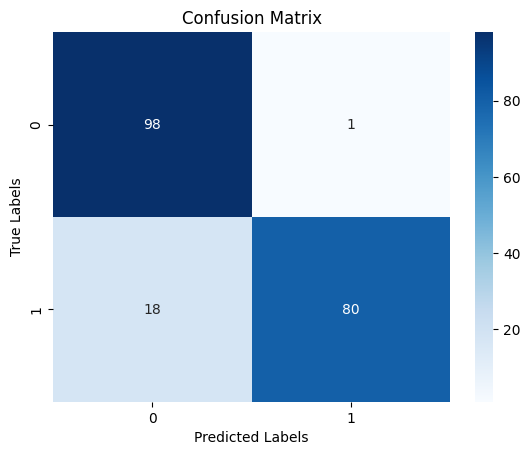

In [ ]:
conf_matrix = confusion_matrix(Y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
#Naive Bayes
nb = GaussianNB()

# Train the classifier on the training data
nb.fit(X_train, Y_train)

y_train_pred = nb.predict(X_train)
y_test_pred = nb.predict(X_test)

# Compute the training and testing accuracy
train_accuracy = accuracy_score(Y_train, y_train_pred)
test_accuracy = accuracy_score(Y_test, y_test_pred)

# Print the accuracies
print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

Training accuracy: 0.9658119658119658
Testing accuracy: 0.9745762711864406


In [ ]:
y_pred = nb.predict(X_test)

# Print the classification report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98        99
         1.0       0.94      0.89      0.92        19

    accuracy                           0.97       118
   macro avg       0.96      0.94      0.95       118
weighted avg       0.97      0.97      0.97       118



In [ ]:
#Nueral Network
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=16, activation='relu', input_dim=30),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=20, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=16, activation='relu', input_dim=30),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=20, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [ ]:
Y_test_pred = model.predict(X_test)
Y_test_pred = (Y_test_pred > 0.5)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

# Print the accuracies
print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

4/4 [==============================] - 0s 3ms/step
Training accuracy: 0.9658119658119658
Testing accuracy: 0.8389830508474576


In [ ]:
y_train_pred = model.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.5)

# Print the classification report for training and testing data
print("Training data classification report:")
print(classification_report(Y_train, y_train_pred))
print("Testing data classification report:")
print(classification_report(Y_test, y_test_pred))

4/4 [==============================] - 0s 3ms/step
Training data classification report:
              precision    recall  f1-score   support

         0.0       0.84      0.98      0.90       393
         1.0       0.00      0.00      0.00        75

    accuracy                           0.82       468
   macro avg       0.42      0.49      0.45       468
weighted avg       0.70      0.82      0.76       468

Testing data classification report:
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91        99
         1.0       0.00      0.00      0.00        19

    accuracy                           0.84       118
   macro avg       0.42      0.50      0.46       118
weighted avg       0.70      0.84      0.77       118



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix

# Predict the labels of the test data
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.5)

# Compute the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_test_pred)

# Print the confusion matrix
print(conf_matrix)



4/4 [==============================] - 0s 4ms/step
[[99  0]
 [19  0]]


In [ ]:
from sklearn.metrics import confusion_matrix

# Predict the labels of the test data
y_train_pred = model.predict(X_train)
y_train_pred = (y_train_pred > 0.5)

# Compute the confusion matrix
conf_matrix = confusion_matrix(Y_train, y_train_pred)

# Print the confusion matrix
print(conf_matrix)



15/15 [==============================] - 0s 1ms/step
[[386   7]
 [ 75   0]]


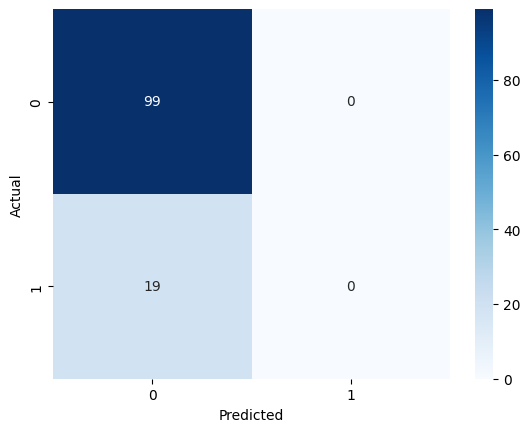

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(Y_test, Y_test_pred)

# Plot the heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


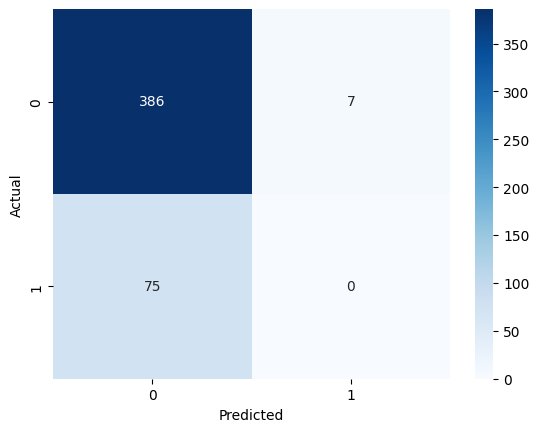

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(Y_train, y_train_pred)

# Plot the heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# Insights
# The accuracy that has been obtained for Logistic Regression has is higher than rest of algorithms.
# Support vector Machine takes more time to run when compared to others.